In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp
from IPython.display import display
from ModelClass import SmallOpenEconomyModel
#from Working_Sim import EconomicModel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Project - The Small Open Economy

Set-up is as follows: GDP, the national identity, is defined as the sum of consumption, investment and net-exports:
$$Y = C + I + NX$$   
GNI adds to this rental income from foreign capital:
$$Y + rF =  C + I + NX + rF$$    
Savings are Gross National Income minus consumption: 
$$S_t = Y_t + rF_t - C_t$$
Savings help accumulate capital - either domestically, or abroad: 
$$S_t = I_t + F_{t+1} - F_t$$
Capital evolves as per usual (at first simplified by assuming zero depreciation ... assumption later relaxed):
$$K_{t+1} = I_t + K_t$$
Combining terms we see that:
$$K_{t+1} = S_t - F_{t+1} + F_t + K_t ↔ K_{t+1} + F_{t+1} = S_t + F_t + K_t$$
Wealth can be domestically owned, or foreign:
$$V_t = K_t + F_t$$
This means that wealth tomorrow is:
$$V_{t+1} = V_t + S_t$$
$S_t = s (Y_t + rF_t)$, where saving, s, is a fraction of income set between 0 and 1.  Our production function is initially defined as CD (we'll show other variants later) $Y_t = AK_t^{\alpha} L_t^{1-\alpha}$. Markets are competitive. $r=r^w$ at all times. This implies a constant level of capital (barring changes to $\alpha$ or A). 
$MP_K$ = $f'k$ = rental rate of capital. Thus, $f'k = \alpha A K_t^{\alpha -1} L_t^{1-\alpha}$, $r^w = \alpha A k_t^{\alpha - 1}$, and $\bar{k} = \left(\frac{r^w}{\alpha A}\right)^{\frac{1}{\alpha-1}}$. Wages are constant by the same reasoning. $MP_L$ = $f'l$ = $\bar{w}$ = $(1-{\alpha})$ $\frac{Y}{L}$ = $(1-{\alpha})A \bar{k}^{\alpha}$. Total returns to scale tell us that $Y_t = rK_t + wL_t$. 

We use sympy to derive the law of motion for wealth and then proceed to the numerical analysis the assignment asks for. 

Equations come from: https://web.econ.ku.dk/dalgaard/makro2_2008/Slides/lecture4_cm.pdf

In [9]:
# Defining the necessary symbols
Y_t, C_t, I_t, r, rw, F_t, K_t, S, s, V_t, V1, L_t, w, n, L_t1, v_t = sp.symbols(
    'Y_t C_t I_t r r^w F_t K_t S s V_t V_{t+1} L_t w n L_{t+1} v_t'
)

# Equation setup
Y = w * L_t + r * K_t         # Production function
GNI = Y + r * F_t               # Gross National Income
S = s * GNI                     # Savings
V = K_t + F_t                   # Wealth at time t
V1 = S + V                      # Wealth at time t+1

# Expand all expressions 
V1_expanded = V1.expand()

# Substitute V_t for K_t + F_t in the expanded V1
V1_substituted = V1_expanded.subs({K_t + F_t: V_t})

# Collect terms to consolidate expressions around V_t
V1_collected = sp.collect(V1_substituted, V_t)

# Explicitly factor out (1 + r * s) from the terms involving V_t
V1_intermed = V1_collected.subs(r * s * K_t + r * s * F_t, (r * s + 1) * V_t).simplify()

# Define L_t+1 
L_1 = L_t * (1 + n)

# Define per capita wealth today and tomorrow 
v_t = V_t / L_t
v_1 = V1_intermed / L_1

# This gives us the Law of Motion for Wealth (LoM)
LoM = v_1.subs(r * s * K_t + r * s * F_t, (r * s + 1) * V_t).simplify()

LoM

(L_t*s*w + V_t*(r*s + 1) + V_t)/(L_t*(n + 1))

We divide this thru by $L_t$ to arrive at: $v_{t+1} = \frac{sw}{1+n}+\frac{1+sr}{1+n}v_t$

In the Steady State, $v_{t+1}=v_t=v^*$

In [10]:
s, w, r, n, v = sp.symbols('s w r n v')
SteadyState = sp.Eq((s * w) / (1 + n) + ((1 + s * r) / (1 + n)) * v, v)
vstar = sp.solve(SteadyState, v)
vstar

[s*w/(n - r*s)]

## Numerical Analysis 

We set up model as a class and draw as phase diagram. 

We then simulate the economy from randomly chosen initial values to get an idea of length of transition period to Steady State

We then use the class to: 
- show effects of Technology shock
- plot response curve to shocks / changes in saving as well as the changes to the global interest rate, $\bar{r}$.
- calculate time to reach steady state



### Let's start by initialising a Model
We're in a Cobb-Doublas model with s=0.2 and slow population growth. Phase diagramme looks as follows:

Calculating steady-state with A=1.00, s=0.20, r=0.02, delta=0.05, n=0.02, alpha=0.30
Calculated capital K: 47.88
Calculated output Y: 3.19
Calculated wage rate w: 2.23
Calculated steady-state wealth per worker: v_ss = \frac{s \cdot w}{1 + n - (1 - delta + s \cdot r)} = \frac{0.45}{0.07} = 6.77


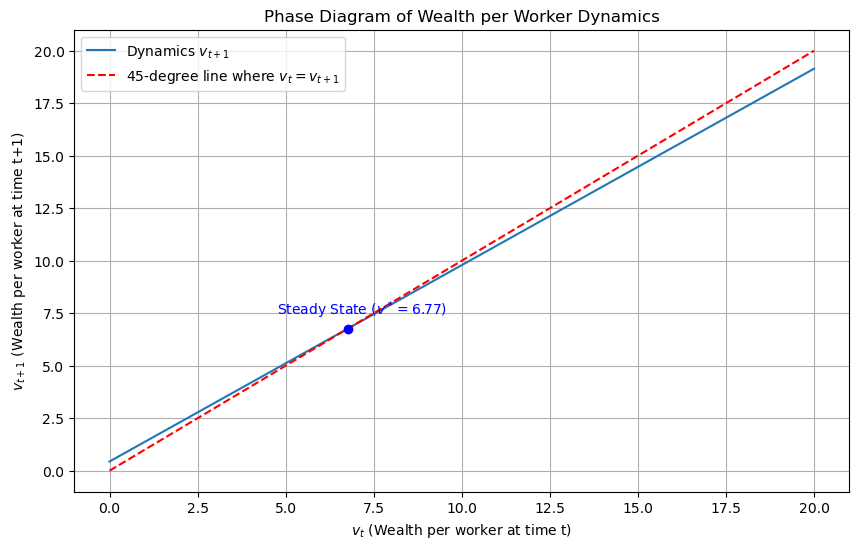

In [11]:
model = SmallOpenEconomyModel()
model.plot_phase_diagram()

# Simulating the model
We show that $v_t$ converges, that $k_t$ and $y_t$ are constant. 

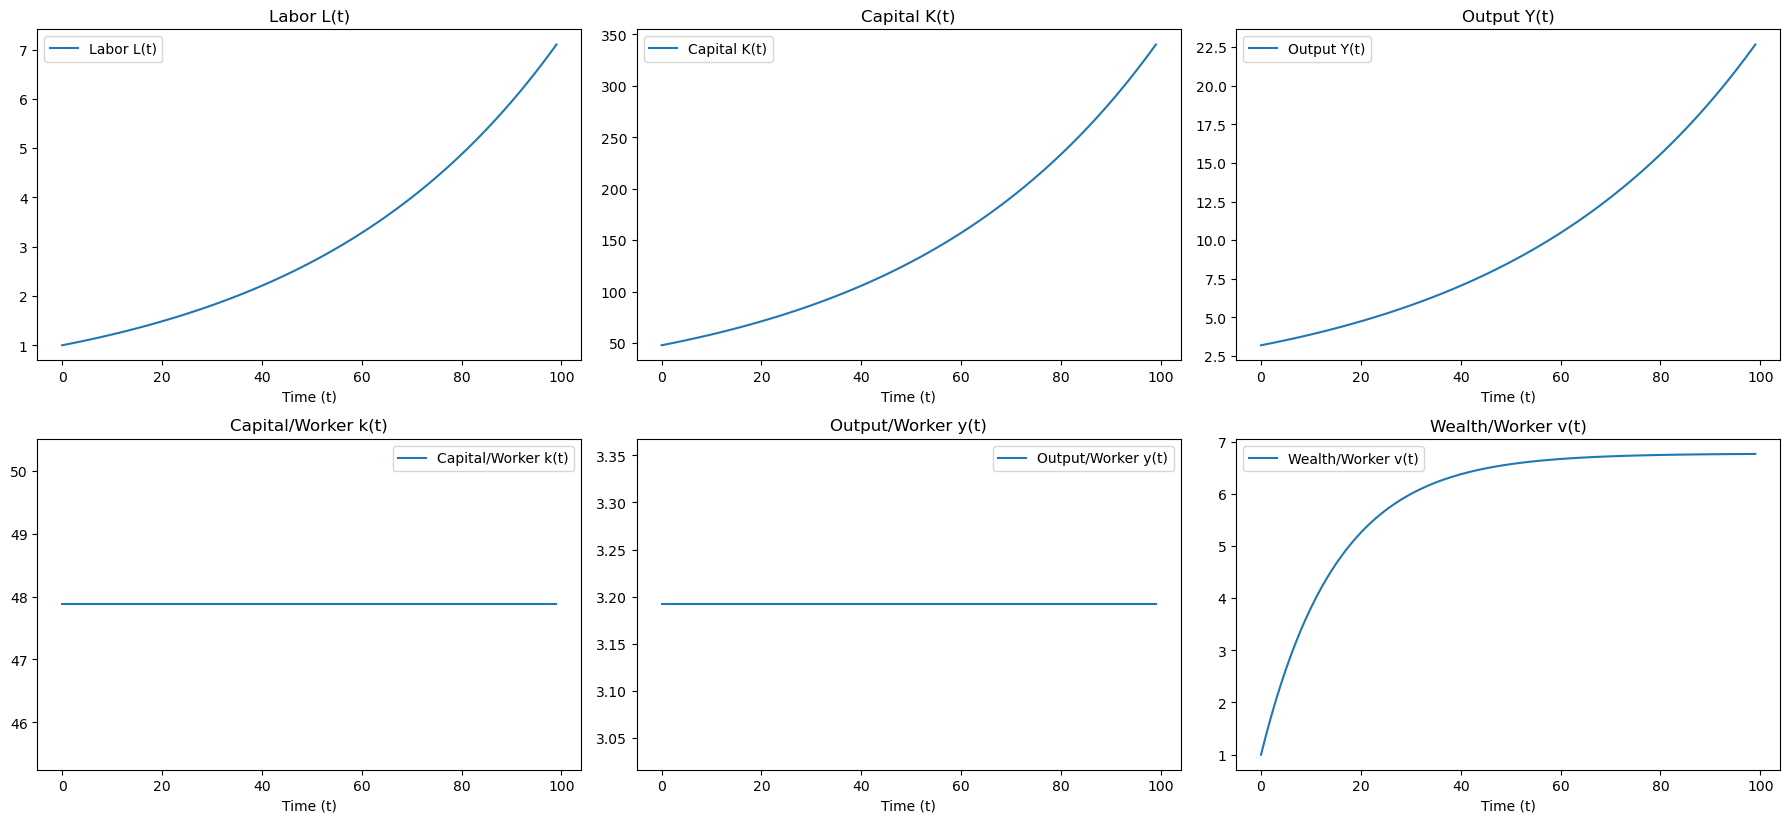

In [12]:
periods = 100
Lt, Kt, Yt, kt, yt, vt = model.simulate(periods)
model.plot_results(Lt, Kt, Yt, kt, yt, vt)

### We then turn to a the main extension of the model, which is an impulse function that shows the effet of a shock. 
We start with a visualisation of an increase in TFP levels at period 50. 

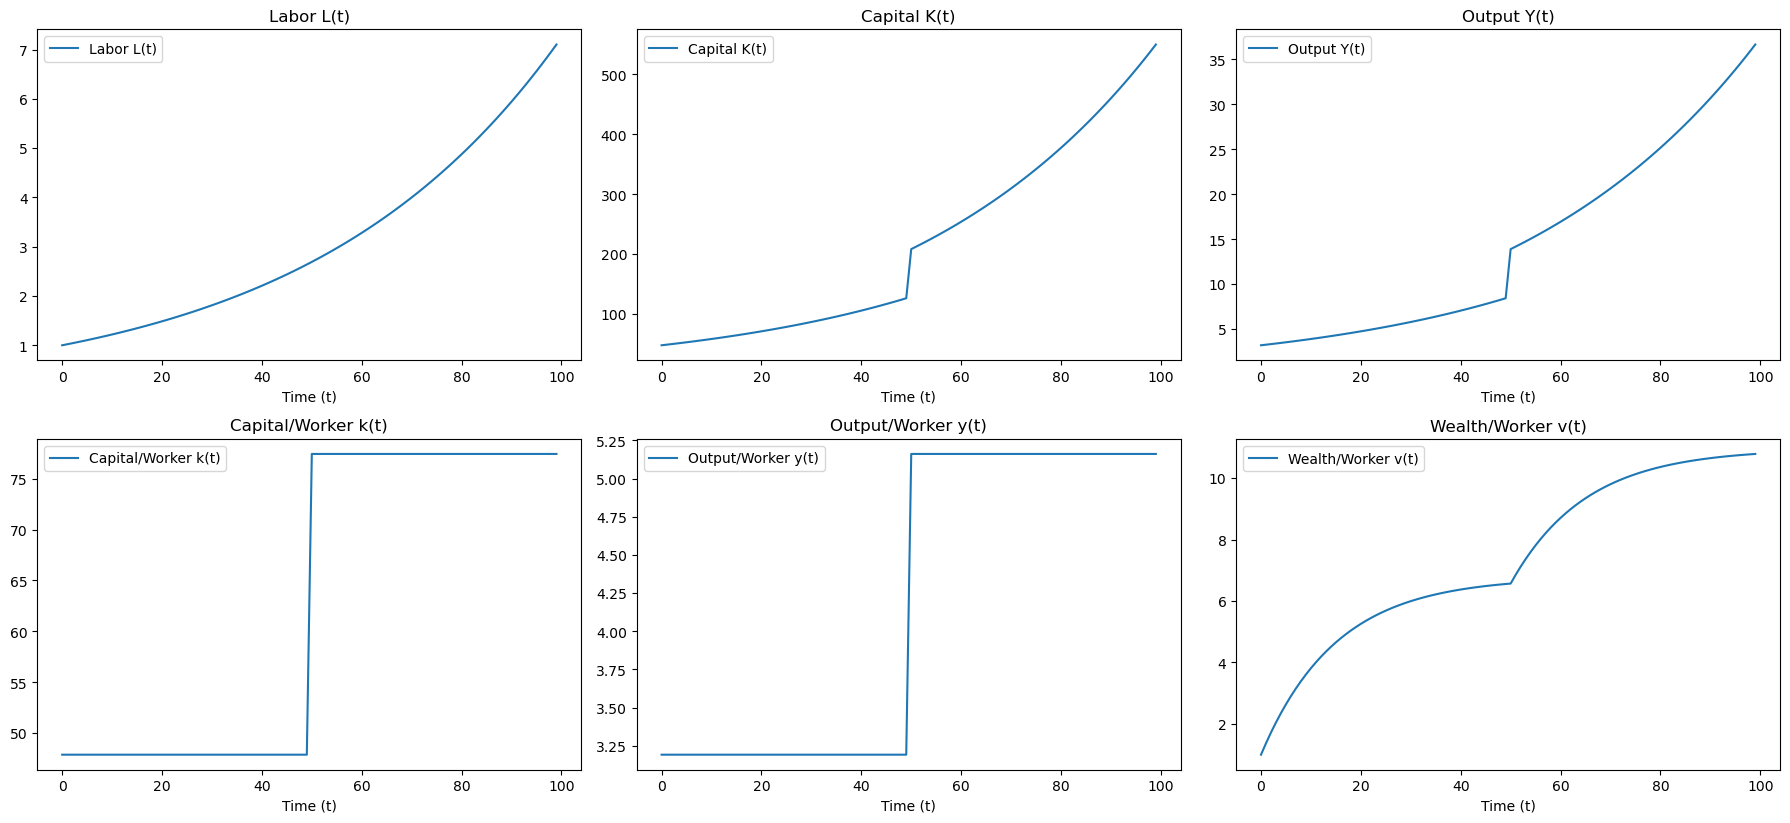

In [13]:
periods = 100
Lt, Kt, Yt, kt, yt, vt = model.simulate(periods, t_shock=50, new_A=1.4)
model.plot_results(Lt, Kt, Yt, kt, yt, vt)

We can also print this as a simple series, which is useful to compare with an Excel simulation, setting up the initial code-structure. 

In [22]:
model.reset() 
model.print_sim(25, t_shock=50, new_A=1)

t	Lt		Kt		Yt		kt		yt		vt
0	1.00		47.88		3.19		47.88		3.19		1.00
1	1.02		48.83		3.26		47.88		3.19		1.37
2	1.04		49.81		3.32		47.88		3.19		1.72
3	1.06		50.81		3.39		47.88		3.19		2.05
4	1.08		51.82		3.45		47.88		3.19		2.35
5	1.10		52.86		3.52		47.88		3.19		2.64
6	1.13		53.92		3.59		47.88		3.19		2.91
7	1.15		55.00		3.67		47.88		3.19		3.16
8	1.17		56.10		3.74		47.88		3.19		3.39
9	1.20		57.22		3.81		47.88		3.19		3.61
10	1.22		58.36		3.89		47.88		3.19		3.81
11	1.24		59.53		3.97		47.88		3.19		4.01
12	1.27		60.72		4.05		47.88		3.19		4.18
13	1.29		61.93		4.13		47.88		3.19		4.35
14	1.32		63.17		4.21		47.88		3.19		4.51
15	1.35		64.44		4.30		47.88		3.19		4.65
16	1.37		65.73		4.38		47.88		3.19		4.79
17	1.40		67.04		4.47		47.88		3.19		4.92
18	1.43		68.38		4.56		47.88		3.19		5.04
19	1.46		69.75		4.65		47.88		3.19		5.15
20	1.49		71.14		4.74		47.88		3.19		5.26
21	1.52		72.57		4.84		47.88		3.19		5.35
22	1.55		74.02		4.93		47.88		3.19		5.45
23	1.58		75.50		5.03		47.88		3.19		5.53
24	1.61		77.01		5.13		47.

## Savings' Shock

We can also model a change to the savings rate:

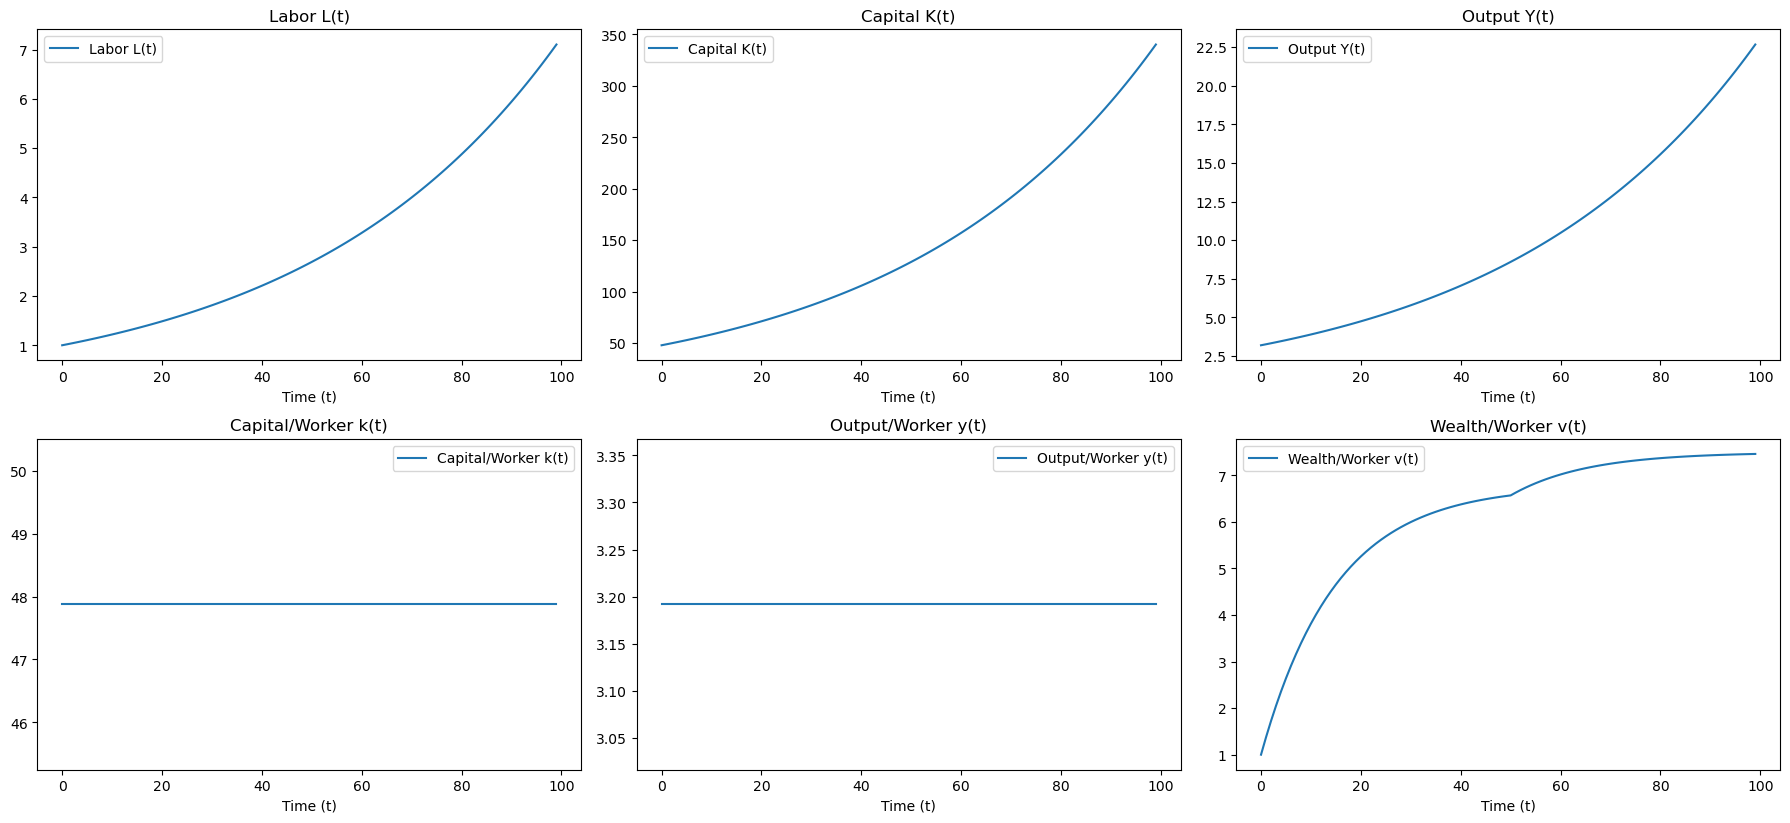

In [15]:
model.reset() 
periods = 100
Lt, Kt, Yt, kt, yt, vt = model.simulate(periods, t_shock=50, new_s=0.22)
model.plot_results(Lt, Kt, Yt, kt, yt, vt)

## Interest Rate Shock:

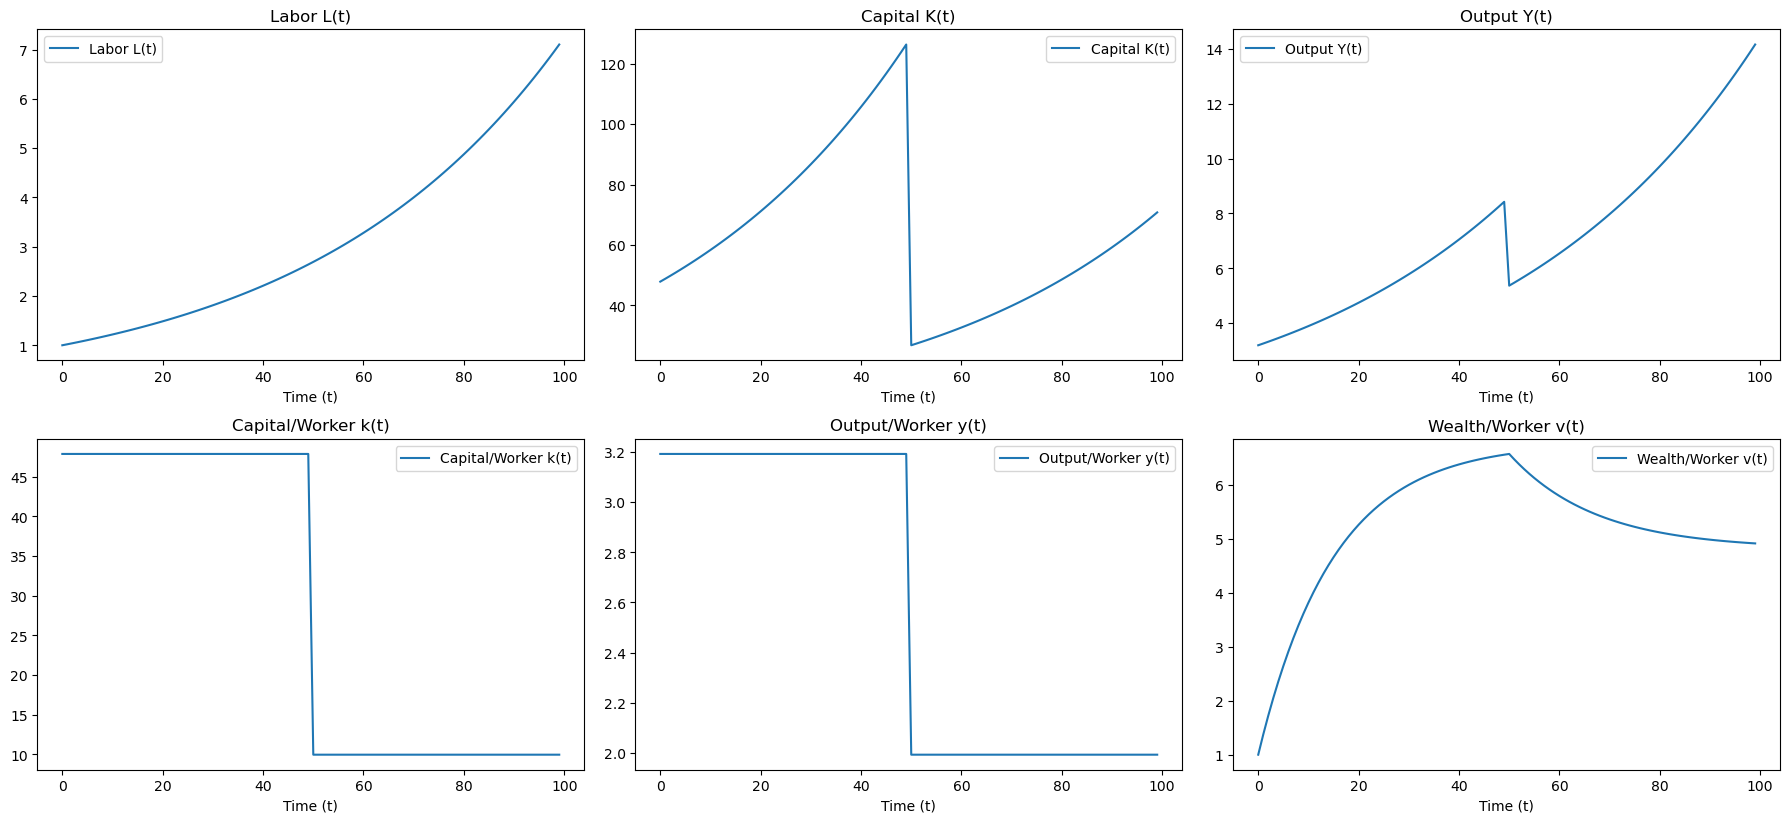

In [17]:
model.reset() 
periods = 100
Lt, Kt, Yt, kt, yt, vt = model.simulate(periods, t_shock=50, new_r=0.06)
model.plot_results(Lt, Kt, Yt, kt, yt, vt)

## How long does it take to reach Steady State after a Shock? 

Calculating steady-state with A=1.00, s=0.20, r=0.01, delta=0.05, n=0.02, alpha=0.30
Calculated capital K: 128.88
Calculated output Y: 4.30
Calculated wage rate w: 3.01
Calculated steady-state wealth per worker: v_ss = \frac{s \cdot w}{1 + n - (1 - delta + s \cdot r)} = \frac{0.60}{0.07} = 8.84
Time to reach steady state: 79 periods after shock


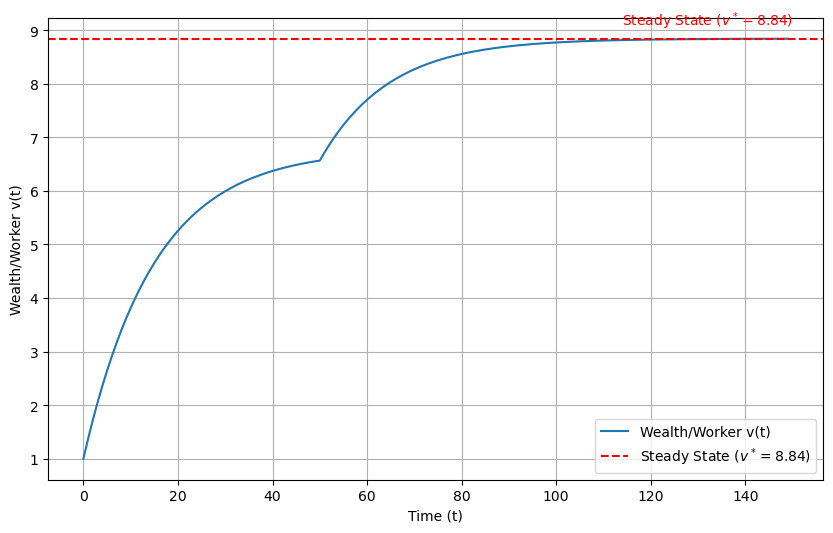

79

In [19]:
model.reset() 
model.time_to_steady_state(150, threshold=0.01, t_shock=50, new_r=0.01)

Calculating steady-state with A=1.40, s=0.20, r=0.02, delta=0.05, n=0.02, alpha=0.30
Calculated capital K: 77.43
Calculated output Y: 5.16
Calculated wage rate w: 3.61
Calculated steady-state wealth per worker: v_ss = \frac{s \cdot w}{1 + n - (1 - delta + s \cdot r)} = \frac{0.72}{0.07} = 10.95
Time to reach steady state: 94 periods after shock


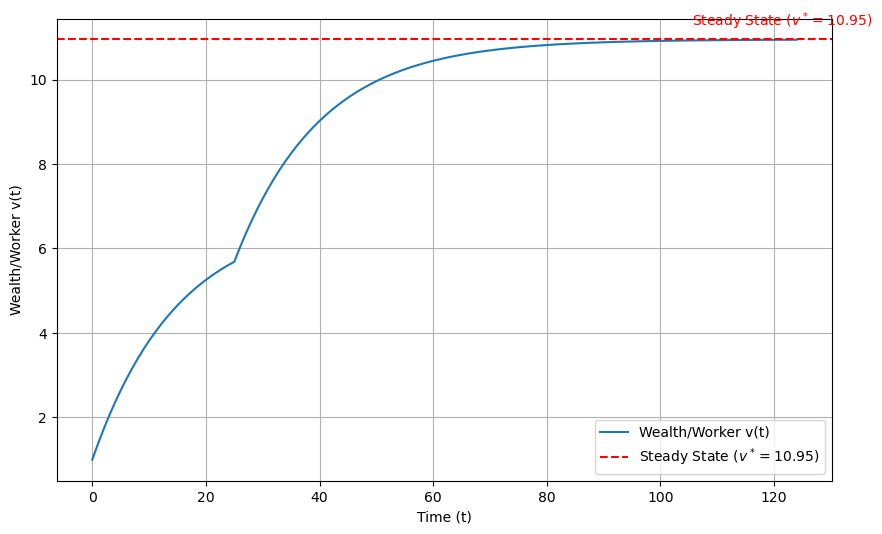

94

In [21]:
model.reset() 
model.time_to_steady_state(125, threshold=0.01, t_shock=25, new_A=1.4)